# Assignment 1 Hardik Galiawala (B00777450)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math 
from sklearn import datasets
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question - 1 Display few images from the given MNIST data-set. The function que1() has a parameter no_of_imgs which allows user to display the number of images he/she wants to see. By default it will show 1 image.

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


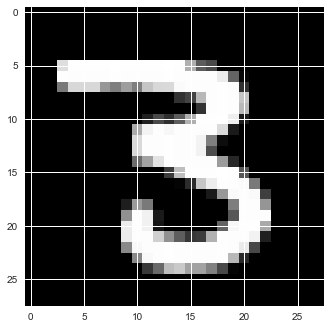

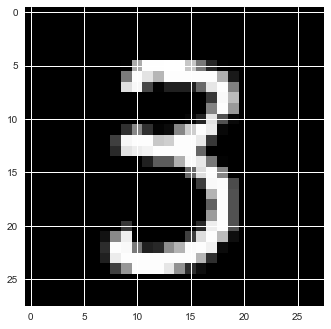

In [6]:
def que1(no_of_imgs = 2):

    mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
    batch = mnist.train.next_batch(50)
    
    for i in range(no_of_imgs - 1):
        
        image = np.array(batch[0][i], dtype='float')
        mat_pix = image.reshape((28, 28))
        plt.imshow(mat_pix, cmap='gray')
        plt.show()

que1(3)

### Question 2(a) : Explain briefly what k-fold cross validation is and what it is used for. 

2(a) :- K-fold cross validation is a technique which gives a distribution of accuracy scores of a model. The distribution totally depends on the value of k. To explain it further, we can say that if k = 5, then we divide the given data (features and target) into 5 equal parts. We take one part of the data as test set and remaining 4 parts as training set. Based on trained model, we can predict an accuracy score for the test set. We repeat this process until all the 5 parts are included once as a test set. Thus, this function will return an array of 5 (or k) accuracy scores

### Question 2(b) : Write a script that does a k-fold cross-validation without using the cross_val_score function and compares the results with the sklearn function. 

2(b): cross_val function which we see in the next line, has almost same functionality as sklearn.cross_validation.cross_val_score provided that cross_val method returns only the accuracy metric.


Parameters explanation:

model : provide a classifier (RandomForest, SVM)

X : input features

y : output set

kfolds : number of folds (like "cv" parameter of sklearn.cross_validation import cross_val_score)

### Question 2(c): Compare the cross-validated results of the SVM & RF and comment on which method is better.  

Answer 2(c): As we observe the results in the form of accuracy score metric, we can say that SVM is better. But we must try to consider other scenarios like real life application, other metrics (e.g., recall, precision, F-score to name a few), and computation cost & time. If we consider these situations then there is a trade-off involved between any two. Thus, we must try to understand which factor is import lets say if precision is important over recall and then try to maximize it. To summarize, we can say that the cross validated accuracy score is not sufficient to comment on which model is the best.

In [9]:
def cross_val(model, X, y, kfolds):

    if kfolds < 2:
        return "Enter K-fold greater than 1"
    
    else:        
        X, y = shuffle(X, y, random_state=0)
        start = 0
        split=0
        partition = int(len(y) / kfolds)
        accuracy = []
        
        for i in range(1, kfolds+1):        
            
            split = split + partition
            if kfolds == 1:
                test_X = X[0:split-1]
                test_y = y[0:split-1]
                train_X = X[split:len(y)-1]
                train_y = y[split:len(y)-1]
                model.fit(train_X, train_y)
                predicted_test = model.predict(test_X)
                accuracy.extend([np.mean(test_y == predicted_test)])
                        
            else:
                test_X =  X[start:split]
                test_y = y[start:split]
                train_X = np.concatenate((X[0:start-1], X[split+1: len(y)-1]), axis = 0)
                train_y = np.concatenate((y[0:start-1], y[split+1: len(y)-1]), axis = 0)
                model.fit(train_X, train_y)
                predicted_test = model.predict(test_X)
                accuracy.extend([np.mean(test_y == predicted_test)])
                
            start = split
        return(accuracy)

In [10]:
def que2():
    iris = datasets.load_iris() 
    X = iris.data
    target = iris.target 
    names = iris.target_names
    acc_rf = cross_val(RandomForestClassifier(n_estimators = 20), X, target, 5)
    acc_svm = cross_val(SVC(), X, target, 5)
    # skLearn function from cross validation accuracy score
    sk_learn_cross_val_rf = cross_val_score(RandomForestClassifier(n_estimators = 20), X, target, cv = 10, scoring = 'accuracy')
    sk_learn_cross_val_svc = cross_val_score(SVC(), X, target, cv = 10, scoring = 'accuracy')
    # Answer 2-b -START
    print("Non aggregated accuracy of user defined cross validation function v/s sk learn cross valtion function")
    print("Accuraccy score of user defined cross val function")
    print(acc_rf)
    
    print("Accuraccy score of sk learn cross val function")
    print(sk_learn_cross_val_rf)
    # Answer 2-b -FINISH
    
    # Answer 2-c - START
    print("Comparing Accuracy score between Random Forest and SVM Classification :")
    print("Random Forest accuracy (Mean) :")
    print(np.mean(sk_learn_cross_val_rf))
    print("SVM Classification accuracy (Mean) :")
    print(np.mean(sk_learn_cross_val_svc))
    # Answer 2-c FINISH

que2()

Non aggregated accuracy of user defined cross validation function v/s sk learn cross valtion function
Accuraccy score of user defined cross val function
[1.0, 0.8666666666666667, 1.0, 1.0, 0.93333333333333335]
Accuraccy score of sk learn cross val function
[ 1.          0.93333333  1.          0.93333333  0.93333333  0.93333333
  0.8         1.          1.          1.        ]
Comparing Accuracy score between Random Forest and SVM Classification :
Random Forest accuracy (Mean) :
0.953333333333
SVM Classification accuracy (Mean) :
0.98


### 3: Please download the wine.zip file and extract it to the directory for this assignment. Read through the wine_names.txt file and come to understand the problem and the wine data contained in the wine.train dataset. Train one of the models SVM, MLP, or RF to develop the best possible model for classifying the wine data

Ans : As we can observe in the method que3() that the best way to solve a machine learning problem is to identify which classifier would be the best for our problem. We have used various classifiers like RandomForest, SVM and Deep Neural Networks. Also while using them we trained its respective hyper pararmeters. After doing so, we have a plot which compares the test accuracy scores from various tuned models. From the graph we conclude that Random Forest with 100 estimators is the best option for our scenario. 

Note : Random Forest (100 estimators) works fine since we have very less amount of training dataset. We would suggest to not use it in case there is good amount of data to train your model as this may overfit your model.

Grap : X-axis - Model with respective hyper parameters, Y-Axis

In [5]:
def model_fit_predict(train_x, test_x, train_y, test_y, model, model_name):
    
    trained_rf_model = model.fit(train_x, train_y)
    
    predicted_test = model.predict(test_x)
    return metrics.accuracy_score(test_y, predicted_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F074E3DCF8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\hardi\\AppData\\Local\\Temp\\tmp6fyjv01c'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:254: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Sav

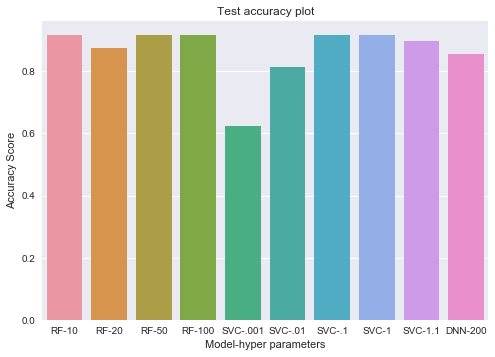

In [17]:
def que3():
    # Library Imports
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    from sklearn.cross_validation import train_test_split
    from sklearn.model_selection import validation_curve
    import tensorflow as tf
    from tensorflow.contrib import learn
    
    # Reading data from the csv file into a pandas data frame
    df_wine = pd.read_csv("winetrain.csv", header=None)
    narr_wine = df_wine.values
    
    # Converting it to n-Dimensional array
    features = np.array(narr_wine[:,1:12])
    target_class = np.array(narr_wine[:, 0])
    
    # Data type conversion for the target variable
    target_class = np.int32(target_class)
    
    # Shuffle data as it
    features, target_class = shuffle(features, target_class, random_state = 0)
    train_x, test_x, train_y, test_y = train_test_split(features, target_class, train_size=0.6)
    
    
    model_name = ['RF-10', 'RF-20', 'RF-50', 'RF-100', 'SVC-.001', 'SVC-.01', 'SVC-.1', 'SVC-1', 'SVC-1.1', 'DNN-200']
    accuracy_score  = []
    
    # Random Forest with varied estimators
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, RandomForestClassifier(n_estimators = 10, random_state = 0), "Random Forest(Estimators = 10)"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, RandomForestClassifier(n_estimators = 20, random_state = 0), "Random Forest(Estimators = 20)"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, RandomForestClassifier(n_estimators = 50, random_state = 0), "Random Forest(Estimators = 50)"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, RandomForestClassifier(n_estimators = 100, random_state = 0), "Random Forest(Estimators = 100)"))
    
    # SVC with varied C values    
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, SVC(kernel='linear', C = 0.001, random_state = 0), "SVC- C = 0.001"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, SVC(kernel='linear', C = 0.01, random_state = 0), "SVC- C = 0.01"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, SVC(kernel='linear', C = 0.1, random_state = 0), "SVC- C = 0.1"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, SVC(kernel='linear', C = 1, random_state = 0), "SVC- C = 1"))
    accuracy_score.append(model_fit_predict(train_x, test_x, train_y, test_y, SVC(kernel='linear', C = 1.1, random_state = 0), "SVC- C = 1.1"))
    
    # DNN classifier
    dnn_model = learn.DNNClassifier(
            feature_columns = [tf.contrib.layers.real_valued_column("", dimension = 12)],
            hidden_units = [10, 10, 10], 
            n_classes = 4)
    dnn_model.fit(train_x, train_y, steps = 200, batch_size = 72)
    
    predicted_y = list(dnn_model.predict(test_x, as_iterable = True))
    #print("Percentage :", np.mean(test_y == predicted_y))
    accuracy_score.append(np.mean(test_y == predicted_y))

    acc_model = sns.barplot(model_name, accuracy_score)
    #rotateTickLabels(acc_model, 45, 'x')
    plt.title("Test accuracy plot")
    sns.despine(ax = acc_model)
    acc_model.set(xlabel='Model-hyper parameters', ylabel='Accuracy Score')
    plt.show()
    
    
    #Reading test CSV
    df_wine_test = pd.read_csv("winetest.csv", header=None)
    narr_wine_test = df_wine_test.values
    
    # Converting it to n-Dimensional array
    features_test_x = np.array(narr_wine_test[:,1:12])
    mod = RandomForestClassifier(n_estimators = 100, random_state = 0)
    trained_rf_100 = mod.fit(features, target_class)
    predict_rf100_test_y = mod.predict(features_test_x)
    
    #test_data = np.concatenate((features_test_x, predict_rf50_test_y), axis = 1)
    #print(predict_rf100_test_y)
    np.savetxt('wineTest(Predicted).csv', predict_rf100_test_y,delimiter=',')
    
    
que3()